# First Part

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr

# Second Part

In [8]:
df_tst=pd.read_csv(r"C:\Users\GityPakhsh\Downloads/test.csv")
df_trn=pd.read_csv(r"C:\Users\GityPakhsh\Downloads/train.csv")

In [9]:
df_trn.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
df_trn.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [11]:
df_trn.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [12]:
df_trn.shape

(10886, 12)

In [13]:
df_trn.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [14]:
df_tst.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [15]:
df_tst.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [16]:
df_tst.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6483,2012-12-31 14:00:00,1,0,1,2,11.48,13.635,45,15.0013
6484,2012-12-31 15:00:00,1,0,1,2,11.48,14.395,45,8.9981
6485,2012-12-31 16:00:00,1,0,1,2,10.66,12.880,48,12.9980
6486,2012-12-31 17:00:00,1,0,1,2,10.66,14.395,48,6.0032
6487,2012-12-31 18:00:00,1,0,1,2,10.66,13.635,48,8.9981
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [17]:
df_tst.shape

(6493, 9)

In [18]:
df_tst.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [19]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [20]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [21]:
df_tst.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

# Third Part

In [22]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
df_trn.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

ther is no NaN data

In [24]:
df_trn.groupby("season").count()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
1,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686
2,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
3,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
4,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734


In [25]:
df_trn.groupby("holiday").count()

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
holiday,,,,,,,,,,,
0,10575,10575,10575,10575,10575,10575,10575,10575,10575,10575,10575
1,311,311,311,311,311,311,311,311,311,311,311


In [26]:
df_trn.groupby("workingday").count()

,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count
workingday,,,,,,,,,,,
0,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474
1,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412


In [27]:
df_trn.groupby("weather").count()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
weather,,,,,,,,,,,
1,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
2,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
3,859,859,859,859,859,859,859,859,859,859,859
4,1,1,1,1,1,1,1,1,1,1,1


There is No "Outlier" Data


# Replacing Missed Values

In [28]:
print(len(df_trn[df_trn["temp"]==0]))
print(len(df_trn[df_trn["atemp"]==0]))
print(len(df_trn[df_trn["humidity"]==0]))
print(len(df_trn[df_trn["windspeed"]==0]))
windmean= (np.mean(df_trn["windspeed"])* (10886/9573))
hummean=(np.mean(df_trn["humidity"]) * (10886/10864))


0
0
22
1313


Now we replace any missed value woth the average of its attribute

In [29]:
for i in range(0,10886):
    if df_trn["windspeed"][i]==0 :
        df_trn["windspeed"][i] = windmean
    if df_trn["humidity"][i]==0:
        df_trn["humidity"][i] = windmean


In [30]:
df_trn.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,14.554917,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,14.554917,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,14.554917,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,14.554917,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,14.554917,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75.0,6.003200,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80.0,14.554917,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86.0,14.554917,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75.0,14.554917,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76.0,14.554917,8,6,14


In [31]:
print(len(df_trn[df_trn["temp"]==0]))
print(len(df_trn[df_trn["atemp"]==0]))
print(len(df_trn[df_trn["humidity"]==0]))
print(len(df_trn[df_trn["windspeed"]==0]))

0
0
0
0


# Calculating the correlation


In [32]:
print("Correlation Between temp and atemp is : ",pearsonr(df_trn["temp"],df_trn["atemp"])[0])
print("Correlation Between temp and humidity is : ",pearsonr(df_trn["temp"],df_trn["humidity"])[0])
print("Correlation Between temp and windspeed is : ",pearsonr(df_trn["temp"],df_trn["windspeed"])[0])
print("Correlation Between atemp and humdity is : ",pearsonr(df_trn["atemp"],df_trn["humidity"])[0])
print("Correlation Between atemp and windspeed is : ",pearsonr(df_trn["atemp"],df_trn["windspeed"])[0])
print("Correlation Between humidity and windspeed is : ",pearsonr(df_trn["humidity"],df_trn["windspeed"])[0])

Correlation Between temp and atemp is :  0.984948110481707
Correlation Between temp and humidity is :  -0.0660753616054441
Correlation Between temp and windspeed is :  -0.03649219433407905
Correlation Between atemp and humdity is :  -0.044517796223426706
Correlation Between atemp and windspeed is :  -0.06519753903642125
Correlation Between humidity and windspeed is :  -0.3062148978284232


There is a strong correlation betwwen "temp" and "atemp". 
and There is a  correlation betwwen "windspeed" and "humidity" too.
 so we should choose one of them for model.


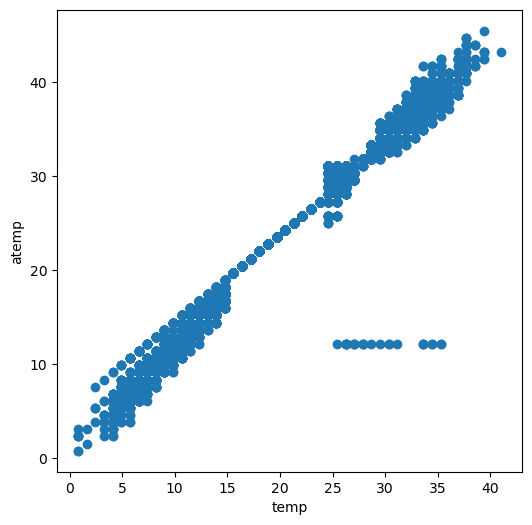

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(df_trn["temp"],df_trn["atemp"])
plt.xlabel("temp")
plt.ylabel("atemp")
plt.show()

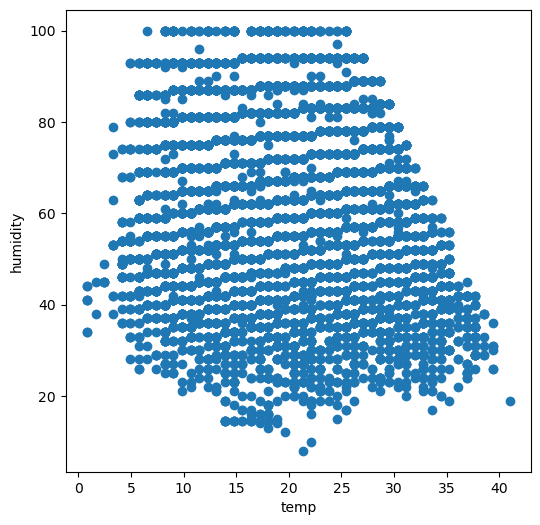

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(df_trn["temp"],df_trn["humidity"])
plt.xlabel("temp")
plt.ylabel("humidity")
plt.show()

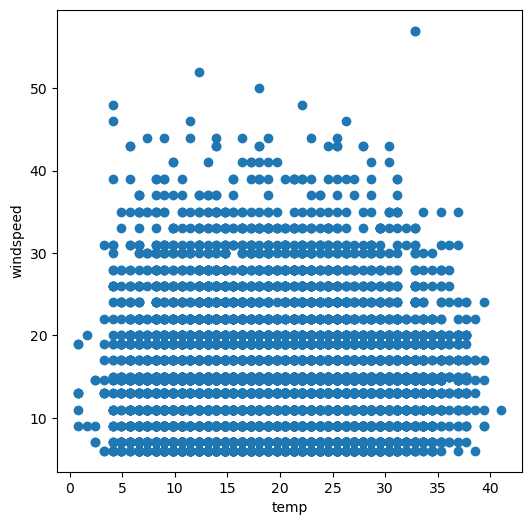

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(df_trn["temp"],df_trn["windspeed"])
plt.xlabel("temp")
plt.ylabel("windspeed")
plt.show()

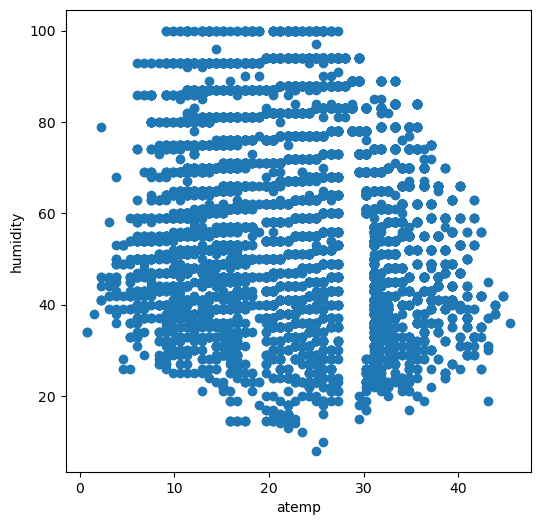

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(df_trn["atemp"],df_trn["humidity"])
plt.xlabel("atemp")
plt.ylabel("humidity")
plt.show()

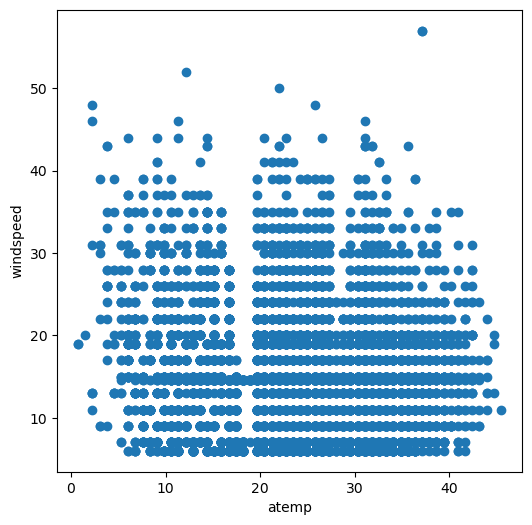

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(df_trn["atemp"],df_trn["windspeed"])
plt.xlabel("atemp")
plt.ylabel("windspeed")
plt.show()

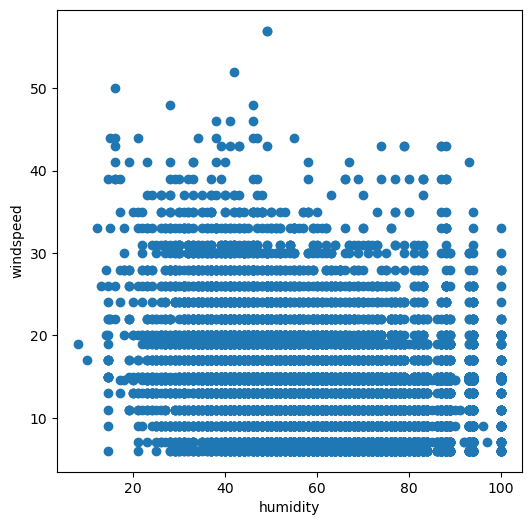

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(df_trn["humidity"],df_trn["windspeed"])
plt.xlabel("humidity")
plt.ylabel("windspeed")
plt.show()

In [39]:
print("Correlation Between temp and count is : ",pearsonr(df_trn["temp"],df_trn["count"])[0])
print("Correlation Between atemp and count is : ",pearsonr(df_trn["atemp"],df_trn["count"])[0])
print("Correlation Between windspeed and count is : ",pearsonr(df_trn["windspeed"],df_trn["count"])[0])
print("Correlation Between humidity and count is : ",pearsonr(df_trn["humidity"],df_trn["count"])[0])


Correlation Between temp and count is :  0.3944536449672491
Correlation Between atemp and count is :  0.3897844366269768
Correlation Between windspeed and count is :  0.08007439534339503
Correlation Between humidity and count is :  -0.3201410829716556


In [40]:
print("Correlation Between temp and registered is : ",pearsonr(df_trn["temp"],df_trn["registered"])[0])
print("Correlation Between atemp and registered is : ",pearsonr(df_trn["atemp"],df_trn["registered"])[0])
print("Correlation Between windspeed and registered is : ",pearsonr(df_trn["windspeed"],df_trn["registered"])[0])
print("Correlation Between humidity and registered is : ",pearsonr(df_trn["humidity"],df_trn["registered"])[0])


Correlation Between temp and registered is :  0.31857128033739146
Correlation Between atemp and registered is :  0.3146353862742632
Correlation Between windspeed and registered is :  0.06941571323344374
Correlation Between humidity and registered is :  -0.26793165970279825


In [41]:
print("Correlation Between temp and casual is : ",pearsonr(df_trn["temp"],df_trn["casual"])[0])
print("Correlation Between atemp and casual is : ",pearsonr(df_trn["atemp"],df_trn["casual"])[0])
print("Correlation Between windspeed and casual is : ",pearsonr(df_trn["windspeed"],df_trn["casual"])[0])
print("Correlation Between humidity and casual is : ",pearsonr(df_trn["humidity"],df_trn["casual"])[0])

Correlation Between temp and casual is :  0.46709706412013285
Correlation Between atemp and casual is :  0.4620665364260026
Correlation Between windspeed and casual is :  0.08047462071246839
Correlation Between humidity and casual is :  -0.350750113132105


#According to the results we delete "Casual" and "Registred" attribute from the dataset

# Prediction 

In [80]:
x=df_trn.iloc[:,1:9]
y=df_trn["count"]
x_test=df_tst.iloc[:,1:]

In [81]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x, y)
clf.scre(x,y)

0.960445773612394


In [87]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x, y)
clf.score(x,y)

0.8960057483052183